In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

spotify_population = pd.read_feather("./data/spotify_2000_2020.feather")
attrition_pop = pd.read_feather("./data/attrition.feather")

In [3]:
mean_attrition_pop = attrition_pop["Attrition"].mean()

In [4]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50["Attrition"].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs((mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop)

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658228


In [5]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100["Attrition"].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs((mean_attrition_pop - mean_attrition_srs100) / mean_attrition_pop)

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455694


In [6]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.2, 0.2, 0.16666666666666666, 0.18333333333333332, 0.18333333333333332]


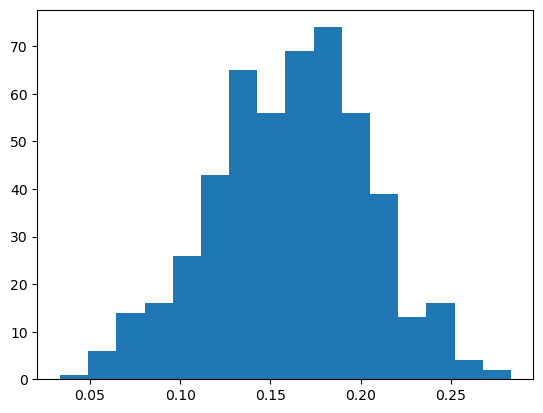

In [7]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

In [9]:
import itertools

## expand_grid comes from
##     https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#creating-example-data
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })


# Print the result
print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


In [10]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + \
                     dice['die3'] + dice['die4'] + \
                     dice['die5']) / 5 
                    
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


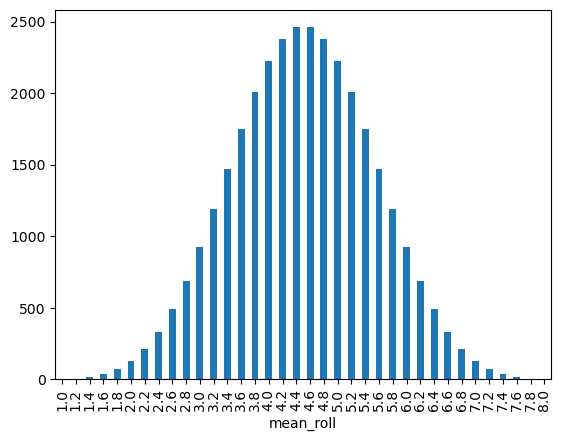

In [11]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')


# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

In [12]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

4.2


In [13]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[6.2, 6.2, 3.4, 5.2, 4.2, 4.2, 4.6, 4.4, 4.8, 4.8]


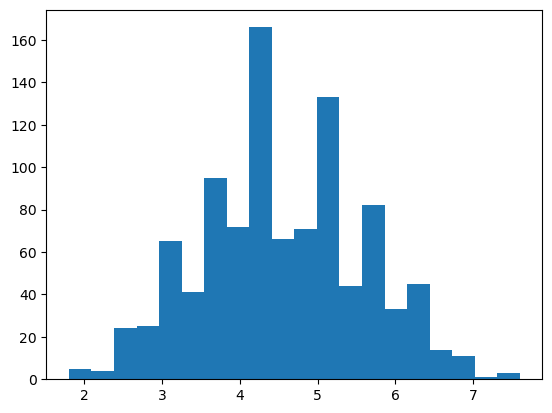

In [15]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

In [23]:
# create a sample distribution of 1000 observation
sampling_distribution_5 = []
sampling_distribution_50 = []
sampling_distribution_500 = []

for i in range(1000):
    sampling_distribution_5.append(
        attrition_pop.sample(n=5)['Attrition'].mean()
    )
    
    sampling_distribution_50.append(
        attrition_pop.sample(n=50)['Attrition'].mean()
    )
    
    sampling_distribution_500.append(
        attrition_pop.sample(n=500)['Attrition'].mean()
    )

In [24]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.1584
0.16474
0.161416


In [25]:
# population attrition mean
pop_attrition_mean = attrition_pop['Attrition'].mean()
print(f"Population mean:> {pop_attrition_mean}")

Population mean:> 0.16122448979591836


In [26]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.16240632935885171
0.0519136535742518
0.01383771752950704


In [27]:
# population attrition standard deviation
pop_attrition_std = np.std(attrition_pop['Attrition'])
print(f"Population standard deviation:> {pop_attrition_std}")

Population standard deviation:> 0.36773788720495787
